In [1]:
import torchray
import loadmodel as lm
import numpy as np
import xml.etree.ElementTree as ET
import cv2
import time
import torch
from torch.autograd import Variable
from torchvision import models
import sys
import numpy as np
import torchvision.datasets as datasets
import glob
import torchray.benchmark
from matplotlib import pyplot as plt
import torchray.benchmark.pointing_game
import os
import torchvision.transforms as transforms
import miscel
import torchray.benchmark.pointing_game
from numpy import savetxt
import exp


In [2]:
import torch
from torch.autograd import Variable
from torchvision import models
use_cuda = torch.cuda.is_available()
def loadAlex():
    model = models.alexnet(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

def loadResnet():
    model = models.resnet50(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

def loadvgg():
    model = models.vgg16(pretrained=True)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

In [7]:
model = loadAlex()
print(model.features[11])

ReLU(inplace=True)


In [3]:
import alx
model = alx.alexr()
print(model.model.features[11])

=> loading checkpoint '/home/mallet/Downloads/AlexNet-R.pt'
=> loaded checkpoint '/home/mallet/Downloads/AlexNet-R.pt' (epoch 90)
ReLU(inplace=True)


In [3]:
'''# Validating energy based pointing game of ScoreCam, using Gradient and VGG16: they reported 41.3%,
# we obtained 41.6%

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0
pgms=0
# Initializing list for runtime
l = []

# number of images we need to calculate things for
nimg = vall.selection
aaa = 0
for i in range(1000):
    img, labele = vall[i]
    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)
    aimg = imwidth*imheight
    abb = (xmax-xmin)*(ymax-ymin)

    if aimg>2*abb:

        aaa+=1
        x = img.unsqueeze(0)
        x = x.cuda()
        saliency = gradient(model, x, labele)
        end = time.time()
        #print(saliency)
        saliency = (saliency - torch.min(saliency))/torch.max(saliency)
        #print(saliency)
        salmap = miscel.sares(saliency, imwidth, imheight)
        alenergy = np.sum(salmap)
        Y, a = miscel.gtbb(imwidth, imheight, xmin, ymin, xmax, ymax)
        whlene = np.multiply(a, salmap)
        gdener = np.sum(whlene)
        dd = gdener/alenergy
        if dd ==0:
            print("what the hell happened?")
        l.append(dd)
        
print("wtf: ", sum(l)/aaa)
print(aaa)'''


'# Validating energy based pointing game of ScoreCam, using Gradient and VGG16: they reported 41.3%,\n# we obtained 41.6%\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\npgms=0\n# Initializing list for runtime\nl = []\n\n# number of images we need to calculate things for\nnimg = vall.selection\naaa = 0\nfor i in range(1000):\n    img, labele = vall[i]\n    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB\n    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)\n    aimg = imwidth*imheight\n    abb = (xmax-xmin)*(ymax-ymin)\n\n    if aimg>2*abb:\n\n        aaa+=1\n        x = img.unsqueeze(0)\n        x = x.cuda()\n        saliency = gradient(model, x, labele)\n        end = time.time()\n        #print(saliency)\n        saliency = (saliency - torch.min(saliency))/torch.max(saliency)\n        #print(saliency)\n        salmap = miscel.sares(saliency, imwidth, imheight)\

In [4]:
'''# Validating energy based pointing game of ScoreCam, using GradCam and VGG16. Reported 48%, got 45%.
# It is close enough!

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0
pgms=0
# Initializing list for runtime
l = []

# number of images we need to calculate things for
nimg = vall.selection
aaa = 0
for i in range(1000):
    img, labele = vall[i]
    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)
    aimg = imwidth*imheight
    abb = (xmax-xmin)*(ymax-ymin)

    if aimg>2*abb:

        aaa+=1
        x = img.unsqueeze(0)
        x = x.cuda()
        saliency = grad_cam(model, x, labele, saliency_layer='features.29')
        end = time.time()
        #print(saliency)
        saliency = (saliency - torch.min(saliency))/torch.max(saliency)
        #print(saliency)
        salmap = miscel.sares(saliency, imwidth, imheight)
        alenergy = np.sum(salmap)
        Y, a = miscel.gtbb(imwidth, imheight, xmin, ymin, xmax, ymax)
        whlene = np.multiply(a, salmap)
        gdener = np.sum(whlene)
        dd = gdener/alenergy
        if dd ==0:
            print("what the hell happened?")
        l.append(dd)
        
print("wtf: ", sum(l)/aaa)
print(aaa)
'''


'# Validating energy based pointing game of ScoreCam, using GradCam and VGG16. Reported 48%, got 45%.\n# It is close enough!\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\npgms=0\n# Initializing list for runtime\nl = []\n\n# number of images we need to calculate things for\nnimg = vall.selection\naaa = 0\nfor i in range(1000):\n    img, labele = vall[i]\n    bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB\n    imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)\n    aimg = imwidth*imheight\n    abb = (xmax-xmin)*(ymax-ymin)\n\n    if aimg>2*abb:\n\n        aaa+=1\n        x = img.unsqueeze(0)\n        x = x.cuda()\n        saliency = grad_cam(model, x, labele, saliency_layer=\'features.29\')\n        end = time.time()\n        #print(saliency)\n        saliency = (saliency - torch.min(saliency))/torch.max(saliency)\n        #print(saliency)\n        salmap = miscel.

In [5]:
# PreXpriment for Gradient method. Evaluate function doesn't work with tolerance = 0 because 
# it makes a matrix of distance from our given point and technically just the point itself has the distance
# zero. So the boolean matrix if the tolerance is 0 would be all false because of this line of code:
#  "accept = (v + u) < self.tolerance**2", technically it needs to have an equal sign to make it work for zero
# as tolerance!

# Correction: tolerance 1 is like tolerance of zero by definition since it checks all the points that have 
# distance of less than 1 which the only point is our own point (xloc, yloc) which eventuall would have 1 True
# if it is in the BB!

'''
# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) 

# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',
                                               transform=val_transforms)

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0

# Initializing list for runtime
l = []
model = lm.loadResnet()
# number of images we need to calculate things for
nimg = vall.selection
aaa = 0
i=1483
img, labele = vall[i]
bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]   
imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)

x = img.unsqueeze(0)
x = x.cuda()
saliency = gradient(model, x, labele)

saliency = (saliency - saliency.min()) /saliency.max()
print(saliency)
sal = torch.squeeze(saliency)
plt.imshow(sal.data.cpu(), cmap='Reds')
plt.show()
xminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)
xloc,yloc = miscel.findloc(saliency)
Y = miscel.gtbb(xminn, yminn, xmaxn, ymaxn)
print(xloc, yloc)
plt.imshow(Y, cmap='Reds')
plt.show()
test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=0)
pg = test.evaluate(Y, (yloc,xloc))
print(pg)
print(saliency.max())
print(saliency.shape)
print(torch.squeeze(saliency)[xloc, yloc])
Y[123, 170]=True
plt.imshow(Y, cmap='Reds')
plt.show()'''

'\n# Transforms needs to be applied to our data set\nval_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),\n                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) \n\n# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set\nvall = torchray.benchmark.datasets.ImageFolder(\'/home/mallet/Desktop/VanillaVsARobust/validationSample\',\n                                               transform=val_transforms)\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\n\n# Initializing list for runtime\nl = []\nmodel = lm.loadResnet()\n# number of images we need to calculate things for\nnimg = vall.selection\naaa = 0\ni=1483\nimg, labele = vall[i]\nbbname = vall.get_image_url(i).split("/")[-1].split(".")[0]   \nimwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)\n\nx = img.unsqueeze(0)\nx = x.cuda()\nsaliency = gradient(model, x, labele)\n\nsalien

In [9]:
# PreXpriment for MP method. The result for robust and Vanilla are really close and it seems
# it is due to the fact that when the true label doesn't have much of probability the respective
# mask is small and weak in this method! Maybe it needs to be investigated later!

# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224))])    
# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',transform = val_transforms)

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0

# Initializing list for runtime
l = []
i = 1483
# number of images we need to calculate things for
nimg = vall.selection
model = lm.loadResnet()

img, labele = vall[i]

In [21]:
I = np.asarray(img)
print(I.shape)
d = I.copy()[:,:,::-1]
print(d.shape)

    
z = d[:,:,0] == I[:, :, 2]
x = z.all()
print(x)

(224, 224, 3)
(224, 224, 3)
True


In [6]:
plt.imshow(np.asanyarray(img))
plt.show()
bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)  
xminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)

ti, saliency = exp.mp(model, img, labele, 300)
print(saliency.shape)
print(ti)
print(saliency.max(), saliency.min())
saliency = miscel.normlze(saliency)
sal = torch.squeeze(saliency)
plt.imshow(sal.cpu().detach().numpy(), cmap='Reds')
plt.show()
xloc,yloc = miscel.findloc(saliency)
print(xloc, yloc)
Y = miscel.gtbb(xminn, yminn, xmaxn, ymaxn)
test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=15)
pg = test.evaluate(Y, (yloc,xloc))
plt.imshow(Y, cmap='Reds')
plt.show()
print(pg)
print(saliency[xloc, yloc])

'\n# Transforms needs to be applied to our data set\nval_transforms = transforms.Compose([transforms.Resize((224,224))])    \n# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set\nvall = torchray.benchmark.datasets.ImageFolder(\'/home/mallet/Desktop/VanillaVsARobust/validationSample\',transform = val_transforms)\n\n# Initializing number of hits in pointing game and total time\nttotal = 0\npgtot = 0\n\n# Initializing list for runtime\nl = []\ni = 1483\n# number of images we need to calculate things for\nnimg = vall.selection\nmodel = lm.loadResnet()\n\nimg, labele = vall[i]     \nplt.imshow(np.asanyarray(img))\nplt.show()\nbbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB\nimwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)  \nxminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)\n\nti, saliency = exp.mp(model, img, labele, 300)\nprint(saliency.shape)\nprint(ti)

In [6]:
# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])    
# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',transform = val_transforms)

# Initializing number of hits in pointing game and total time
ttotal = 0
pgtot = 0

# Initializing list for runtime
l = []

# number of images we need to calculate things for
nimg = vall.selection

i = 1483
img, labele = vall[i]
bbname = vall.get_image_url(i).split("/")[-1].split(".")[0]             # Extracting image url to retrieve its BB
imwidth, imheight, xmin, ymin, xmax, ymax = miscel.bbinfo(bbname)   
xminn, yminn, xmaxn, ymaxn = miscel.newloc(imwidth, imheight, xmin, ymin, xmax, ymax)
x = img.unsqueeze(0)
x = x.cuda()
start = time.time()
saliency, v = extremal_perturbation( loadResnet(), x, labele, reward_func=contrastive_reward, debug=False, areas=[0.025, 0.05, 0.1, 0.2],smooth=0.09)
end = time.time()
d = end - start
print(d)

43.70841455459595


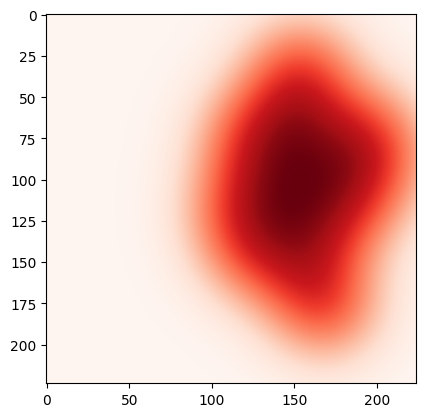

In [4]:
sal = torch.squeeze(saliency[3,:,:,:])
plt.imshow(sal.cpu().detach().numpy(), cmap='Reds')
plt.show()

In [9]:
#print(saliency[0,:,:,:], saliency[1,:,:,:], saliency[2,:,:,:],saliency[3,:,:,:])
d = saliency[0,:,:,:] + saliency[1,:,:,:]+ saliency[2,:,:,:]+saliency[3,:,:,:]
print(d)
print(d.shape)
mask = saliency.sum(dim=0, keepdim=True)
print(mask.shape)
print(torch.equal(mask.squeeze(0), d))

tensor([[[0.0028, 0.0029, 0.0030,  ..., 0.0109, 0.0100, 0.0092],
         [0.0030, 0.0031, 0.0032,  ..., 0.0118, 0.0108, 0.0099],
         [0.0031, 0.0032, 0.0033,  ..., 0.0127, 0.0117, 0.0107],
         ...,
         [0.0030, 0.0031, 0.0032,  ..., 0.0093, 0.0085, 0.0078],
         [0.0029, 0.0030, 0.0031,  ..., 0.0086, 0.0079, 0.0072],
         [0.0028, 0.0029, 0.0030,  ..., 0.0079, 0.0073, 0.0067]]],
       device='cuda:0')
torch.Size([1, 224, 224])
torch.Size([1, 1, 224, 224])
True


In [29]:
print(salieny)
print(salieny.shape)
torch.equal(d, salieny[0,:,:,:])
print(torch.max(d))
print(torch.max(salieny))
print(torch.sum(d==torch.max(d)))
vv = torch.flatten(d)
vv.sort()

tensor([[[0.0022, 0.0023, 0.0023,  ..., 0.0075, 0.0069, 0.0063],
         [0.0023, 0.0024, 0.0024,  ..., 0.0081, 0.0074, 0.0068],
         [0.0024, 0.0025, 0.0026,  ..., 0.0087, 0.0081, 0.0074],
         ...,
         [0.0023, 0.0024, 0.0025,  ..., 0.0143, 0.0131, 0.0120],
         [0.0023, 0.0023, 0.0024,  ..., 0.0133, 0.0122, 0.0111],
         [0.0022, 0.0022, 0.0023,  ..., 0.0123, 0.0112, 0.0103]]],
       device='cuda:0')
torch.Size([1, 224, 224])
tensor([[[[0.0022, 0.0023, 0.0023,  ..., 0.0075, 0.0069, 0.0063],
          [0.0023, 0.0024, 0.0024,  ..., 0.0081, 0.0074, 0.0068],
          [0.0024, 0.0025, 0.0026,  ..., 0.0087, 0.0081, 0.0074],
          ...,
          [0.0023, 0.0024, 0.0025,  ..., 0.0143, 0.0131, 0.0120],
          [0.0023, 0.0023, 0.0024,  ..., 0.0133, 0.0122, 0.0111],
          [0.0022, 0.0022, 0.0023,  ..., 0.0123, 0.0112, 0.0103]]]],
       device='cuda:0')
torch.Size([1, 1, 224, 224])
tensor(2.4336, device='cuda:0')
tensor(2.4336, device='cuda:0')
tensor(1, dev

torch.return_types.sort(
values=tensor([2.1047e-03, 2.1054e-03, 2.1073e-03,  ..., 2.4332e+00, 2.4334e+00,
        2.4336e+00], device='cuda:0'),
indices=tensor([33824, 34048, 33600,  ..., 18296, 18295, 18520], device='cuda:0'))

In [11]:
d[0,45,32]==saliency[0,0,45,32] + saliency[1,0,45,32]+ saliency[2,0,45,32]+saliency[3,0,45,32]

tensor(True, device='cuda:0')

In [ ]:
xloc,yloc = miscel.findloc(saliency)
Y = miscel.gtbb(imwidth, imheight, xmin, ymin, xmax, ymax)
test = torchray.benchmark.pointing_game.PointingGame(1000, tolerance=15)
pg = test.evaluate(Y, (yloc,xloc))
if pg==1:
    pgtot+=1

In [7]:
import loadmodel as lm

In [10]:
#model= lm.loadgoogleR()
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

In [11]:
# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) 

# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample', transform=val_transforms)
for p in model.parameters():
    p.requires_grad = True

i=1483
img, labele = vall[i]


In [12]:
x = img.unsqueeze(0)
x = x.cuda()

In [23]:
print(model.model.fea)
#target_layer = model[0].model.layer4[-1]
#print(target_layer)

MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)


In [24]:
cam = GradCAM(model=model, target_layer=target_layer, use_cuda=True)

In [25]:
start = time.time()
grayscale_cam = cam(input_tensor=x, target_category=labele)
end = time.time()
d = end -start
print(d)

TypeError: tuple indices must be integers or slices, not tuple

In [14]:
print(grayscale_cam.shape)
print(np.array_equal(grayscale_cam[0,:,:], grayscale_cam[0, :]))
print(grayscale_cam.shape)

(1, 224, 224)
True
(1, 224, 224)


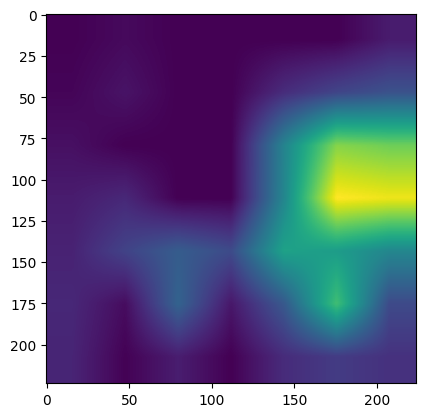

In [20]:
plt.imshow(saliency)
plt.show()

In [15]:
miscel.gradfindloc(grayscale_cam)

(111, 176)

NameError: name 'saliency' is not defined

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np


# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])    
# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/Dataa/rnddata/valid',transform = val_transforms)

model = lm.loadResnet()

In [5]:
'''correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        # calculate outputs by running images through the network
        outputs= model(images)

        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        if not(predicted == labels):
            print('what just happened')
print(correct/2000)'''

"correct = 0\ntotal = 0\n# since we're not training, we don't need to calculate the gradients for our outputs\nwith torch.no_grad():\n    for data in val_loader:\n        images, labels = data\n        images, labels = images.cuda(), labels.cuda()\n        # calculate outputs by running images through the network\n        outputs= model(images)\n\n        # the class with the highest energy is what we choose as prediction\n        _, predicted = torch.max(outputs.data, 1)\n        if not(predicted == labels):\n            print('what just happened')\nprint(correct/2000)"

In [23]:
from captum.attr import IntegratedGradients
images, labels = vall[1483]
x = images.unsqueeze(0)
x = x.cuda()
ig = IntegratedGradients(model)
start = time.time()
attributions = ig.attribute(x, target=labels)
fin = time.time()
d = fin-start
print(d)

0.31445908546447754


In [24]:
attributions.shape

torch.Size([1, 3, 224, 224])

In [25]:
torch.max(attributions)

tensor(0.6271, device='cuda:0', dtype=torch.float64)

In [26]:
torch.min(attributions)

tensor(-0.6971, device='cuda:0', dtype=torch.float64)

In [52]:
attr = torch.squeeze(attributions)
print(attr.shape)
d = torch.mean(attr,0)
dd = torch.mean(attr,0,keepdim=True)
ddd = torch.mean(attributions, 1,keepdim=True)
print(d.shape, dd.shape, ddd.shape)
print(torch.equal(d.unsqueeze(0), dd))
print(torch.equal(dd.unsqueeze(0), ddd))

torch.Size([3, 224, 224])
torch.Size([224, 224]) torch.Size([1, 224, 224]) torch.Size([1, 1, 224, 224])
True
True


In [11]:

from captum.attr import IntegratedGradients
from torchray.attribution.rise import rise
from torchray.benchmark import get_example_data, plot_example
from torchray.utils import get_device
vv= 1483
images, labels = vall[vv]
print(vall.get_image_url(vv))
x = images.unsqueeze(0)
x = x.cuda()
start = time.time()
saliency = rise(model = model, input = x, resize=True,batch_size=32, num_masks=8000)
print(saliency.shape)
sal = saliency[:, labels,:, :].unsqueeze(1)
fin = time.time()
print(sal.shape)
d = fin-start
print(d)
#print(torch.equal(v,sal))
torch.squeeze(saliency).shape

/home/mallet/Desktop/Dataa/rsnt/valid/n03956157/ILSVRC2012_val_00035358.JPEG
torch.Size([1, 1000, 224, 224])
torch.Size([1, 1, 224, 224])
22.035927534103394


torch.Size([1000, 224, 224])

In [12]:
print(saliency[:,798,:,:].unsqueeze(1).shape)
print(saliency.min(), saliency.max())
print(sal.shape)
torch.equal(sal.squeeze(0), saliency[:,labels,:,:])
print(labels)
print(sal.max(), sal.min())

torch.Size([1, 1, 224, 224])
tensor(0.0082, device='cuda:0') tensor(0.5116, device='cuda:0')
torch.Size([1, 1, 224, 224])
727
tensor(0.5116, device='cuda:0') tensor(0.4916, device='cuda:0')


In [13]:
sall = (sal - sal.min() )/(sal.max()-sal.min())

In [14]:
sall.max()

tensor(1., device='cuda:0')

In [15]:
sall.min()

tensor(0., device='cuda:0')

In [16]:
'''mapp = (2*sall)-1
print(mapp.min(), mapp.max())
print(mapp.shape)'''

'mapp = (2*sall)-1\nprint(mapp.min(), mapp.max())\nprint(mapp.shape)'

In [17]:
sa = torch.squeeze(sall)
saa = sa.cpu().numpy()

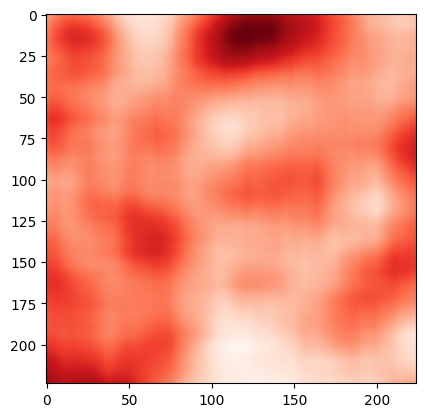

In [18]:
plt.imshow(saa, cmap='Reds')
plt.show()

In [70]:
labels

999

In [97]:
d, l = vall[9]

In [99]:
l

4